# Taller: Análisis de Tendencias para Google y Microsoft

En este taller analizaremos los datos de precios para Google y Microsoft (símbolos `GOOGL` y `MSFT`) utilizando la base `prices.csv`.

El objetivo es:

- Filtrar los datos para estas dos empresas.
- Convertir la columna de fecha de forma robusta, ya que diferentes empresas pueden tener distintos formatos de fecha.
- Ordenar los datos por fecha.
- Aplicar un suavizado (media móvil) para ver la tendencia general durante el periodo (máximo 2016).
- Generar una gráfica final que integre un storytelling (Setup, Conflict y Resolution) en el análisis de la tendencia.

Responde las siguientes preguntas en el proceso:

1. ¿Cuáles son el primer y último año del dataset para las empresas seleccionadas?
2. ¿Cuántas observaciones tienes para cada empresa?
3. ¿Qué tendencia se observa tras aplicar el suavizado?


In [5]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
!unzip time_series.zip
!cp -r time_series/* ./

--2025-04-10 18:37:10--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip [following]
--2025-04-10 18:37:10--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15602616 (15M) [application/zip]
Saving to: ‘time_series.zip’

time_series.zip     100%[===================>]  14.88M  --.-KB/s    in 0.09s   

2025-04-10 18:37:11 (164 MB/s) - ‘time_

## Paso 1: Carga del Dataset y Filtrado de Empresas

Carga el archivo `prices.csv` y filtra únicamente los datos correspondientes a Google y Microsoft.

Pregunta: ¿Qué cantidad de observaciones tienes para cada empresa después del filtrado?

In [6]:
import pandas as pd

In [7]:
prices=pd.read_csv('prices.csv')
prices

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [8]:
google = prices[prices['symbol'] == 'GOOGL']
google

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
1844,2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2312,2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0
...,...,...,...,...,...,...,...
848964,2016-12-23,GOOGL,808.010010,807.799988,805.109985,810.969971,764100.0
849464,2016-12-27,GOOGL,808.679993,809.929993,805.799988,816.000000,974400.0
849964,2016-12-28,GOOGL,813.330017,804.570007,802.440002,813.330017,1199700.0
850464,2016-12-29,GOOGL,802.330017,802.880005,798.140015,805.750000,1056500.0


In [9]:
microsoft = prices[prices['symbol'] == 'MSFT']
microsoft

,date,symbol,open,close,low,high,volume
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1480,2010-01-06,MSFT,30.879999,30.770000,30.520000,31.080000,58182400.0
1948,2010-01-07,MSFT,30.629999,30.450001,30.190001,30.700001,50559700.0
2416,2010-01-08,MSFT,30.280001,30.660000,30.240000,30.879999,51197400.0
...,...,...,...,...,...,...,...
849076,2016-12-23,MSFT,63.450001,63.240002,62.799999,63.540001,12403800.0
849576,2016-12-27,MSFT,63.209999,63.279999,63.209999,64.070000,11763200.0
850076,2016-12-28,MSFT,63.400002,62.990002,62.830002,63.400002,14653300.0
850576,2016-12-29,MSFT,62.860001,62.900002,62.730000,63.200001,10250600.0


In [10]:
num_google = len(google)
num_google

1762

In [11]:
print(f'Cantidad de observaciones para Google: {num_google}')

Cantidad de observaciones para Google: 1762


In [12]:
num_microsoft = len(microsoft)
num_microsoft

1762

In [13]:
print(f'Cantidad de observaciones para Microsoft: {num_microsoft}')

Cantidad de observaciones para Microsoft: 1762


## Paso 2: Conversión Robust a Formato Datetime

Dado que diferentes empresas podrían tener formatos de fecha distintos, convertiremos la columna `date` usando `pd.to_datetime` sin forzar un formato fijo.

Elimina las filas que no se puedan convertir (donde la fecha es `NaT`).

Pregunta: ¿Cuántas filas se descartan por tener fechas inválidas?

In [14]:
google['date'] = pd.to_datetime(google['date'], errors='coerce')
google = google.dropna(subset=['date'])
filas_descartadas_google = num_google - len(google)

<ipython-input-14-27c3f4c33fe4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['date'] = pd.to_datetime(google['date'], errors='coerce')


In [15]:
print(f'Filas descartadas para Google: {filas_descartadas_google}')

Filas descartadas para Google: 0


In [16]:
microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')
microsoft = microsoft.dropna(subset=['date'])
filas_descartadas_microsoft = num_microsoft - len(microsoft)

<ipython-input-16-4bfd8ba0235b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')


In [17]:
print(f'Filas descartadas para Microsoft: {filas_descartadas_microsoft}')

Filas descartadas para Microsoft: 0


## Paso 3: Ordenar Datos y Análisis Inicial

Ordena los datos por la columna `date` para cada empresa y determina:

- ¿Cuál es el primer año y el último año para cada empresa?
- ¿Cuántas observaciones hay en total para el periodo (recordando que la fecha máxima es 2016)?

In [18]:
google = google.sort_values(by=['date'])
primer_año_google = google['date'].dt.year.min()
ultimo_año_google = google['date'].dt.year.max()

In [19]:
primer_año_google

2010

In [20]:
ultimo_año_google

2016

In [21]:
microsoft = microsoft.sort_values(by=['date'])
primer_año_microsoft = microsoft['date'].dt.year.min()
ultimo_año_microsoft = microsoft['date'].dt.year.max()

In [22]:
primer_año_microsoft

2010

In [23]:
ultimo_año_microsoft

2016

In [24]:
google_2016 = google[google['date'].dt.year <= 2016]

In [25]:
google_2016

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
1844,2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2312,2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0
...,...,...,...,...,...,...,...
848964,2016-12-23,GOOGL,808.010010,807.799988,805.109985,810.969971,764100.0
849464,2016-12-27,GOOGL,808.679993,809.929993,805.799988,816.000000,974400.0
849964,2016-12-28,GOOGL,813.330017,804.570007,802.440002,813.330017,1199700.0
850464,2016-12-29,GOOGL,802.330017,802.880005,798.140015,805.750000,1056500.0


In [26]:
num_observaciones_google = len(google_2016)
num_observaciones_google

1762

In [27]:
microsoft_2016 = microsoft[microsoft['date'].dt.year <= 2016]

In [28]:
microsoft_2016

,date,symbol,open,close,low,high,volume
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1480,2010-01-06,MSFT,30.879999,30.770000,30.520000,31.080000,58182400.0
1948,2010-01-07,MSFT,30.629999,30.450001,30.190001,30.700001,50559700.0
2416,2010-01-08,MSFT,30.280001,30.660000,30.240000,30.879999,51197400.0
...,...,...,...,...,...,...,...
849076,2016-12-23,MSFT,63.450001,63.240002,62.799999,63.540001,12403800.0
849576,2016-12-27,MSFT,63.209999,63.279999,63.209999,64.070000,11763200.0
850076,2016-12-28,MSFT,63.400002,62.990002,62.830002,63.400002,14653300.0
850576,2016-12-29,MSFT,62.860001,62.900002,62.730000,63.200001,10250600.0


In [29]:
num_observaciones_microsoft = len(microsoft_2016)
num_observaciones_microsoft

1762

En total hay 3524 observaciones


## Paso 4: Visualización Inicial (Setup) – Gráfica de Precios de Cierre

Construye una gráfica inicial que muestre el precio de cierre a lo largo del tiempo para Google y Microsoft.

Utiliza un título multi-línea que comunique la etapa Setup. Por ejemplo:

```
Setup: Serie de Precios sin Suavizado
Datos originales para Google y Microsoft
CONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS
```

Pregunta: ¿Qué diferencias notas entre las series de ambas empresas?

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

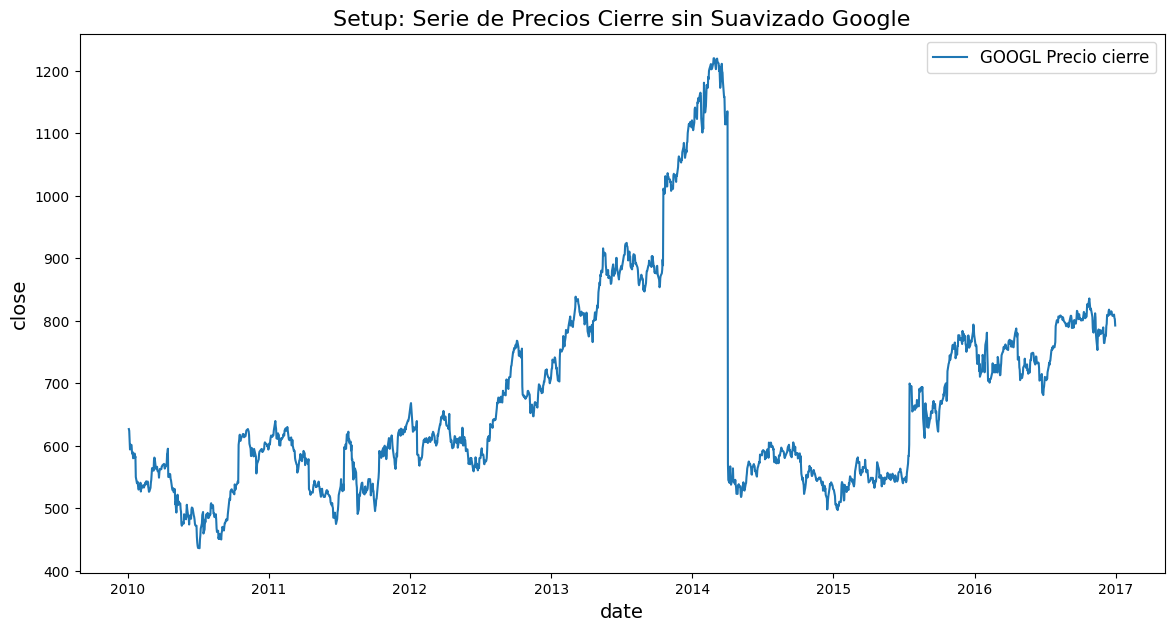

In [34]:
pivot = google_2016.pivot_table(index='date', values='close', columns='symbol')
plt.figure(figsize=(14, 7))
plt.plot(pivot.index, pivot['GOOGL'], label='GOOGL Precio cierre', linewidth=1.5)
plt.title('Setup: Serie de Precios Cierre sin Suavizado Google', fontsize=16)
plt.xlabel('date', fontsize=14)
plt.ylabel('close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

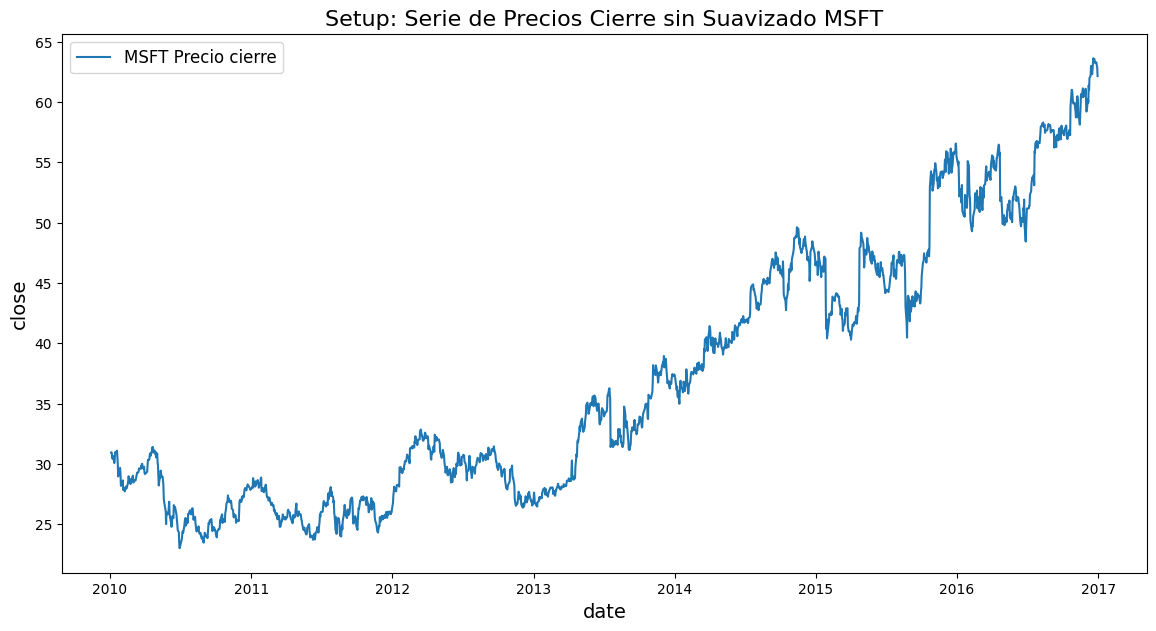

In [38]:
pivot_microsoft = microsoft_2016.pivot_table(index='date', values='close', columns='symbol')
plt.figure(figsize=(14, 7))
# Use pivot_microsoft instead of pivot to access the 'MSFT' column
plt.plot(pivot_microsoft.index, pivot_microsoft['MSFT'], label='MSFT Precio cierre', linewidth=1.5)
plt.title('Setup: Serie de Precios Cierre sin Suavizado MSFT', fontsize=16)
plt.xlabel('date', fontsize=14)
plt.ylabel('close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

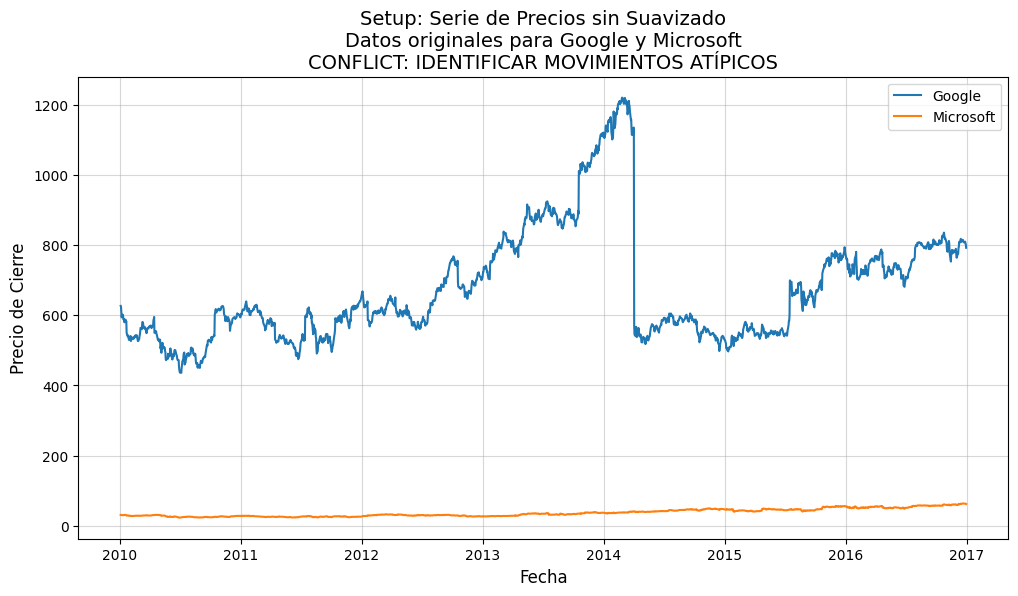

In [46]:
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
plt.plot(google_2016['date'], google_2016['close'], label='Google')
plt.plot(microsoft_2016['date'], microsoft_2016['close'], label='Microsoft')
plt.title('Setup: Serie de Precios sin Suavizado\nDatos originales para Google y Microsoft\nCONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.5)
plt.show()

Los costos de ambas compañías presentan una tendencia en aumento a lo largo del período, sin embargo, el valor de las acciones de Google experimenta un crecimiento más acelerado que el de Microsoft. Asimismo, el valor de las acciones de Google parece ser más inestable, con fluctuaciones mayores en comparación con Microsoft.

## Paso 5: Aplicar Suavizado (Resolution) – Media Móvil y Análisis de Tendencia

Aplica un suavizado a las series (por ejemplo, una media móvil) para resaltar la tendencia general en los datos.

Pregunta: ¿Qué ventana de suavizado (en días) consideras adecuada para observar la tendencia en el año 2016? ¿Cómo se comporta la tendencia para Google y Microsoft después de suavizar los datos?

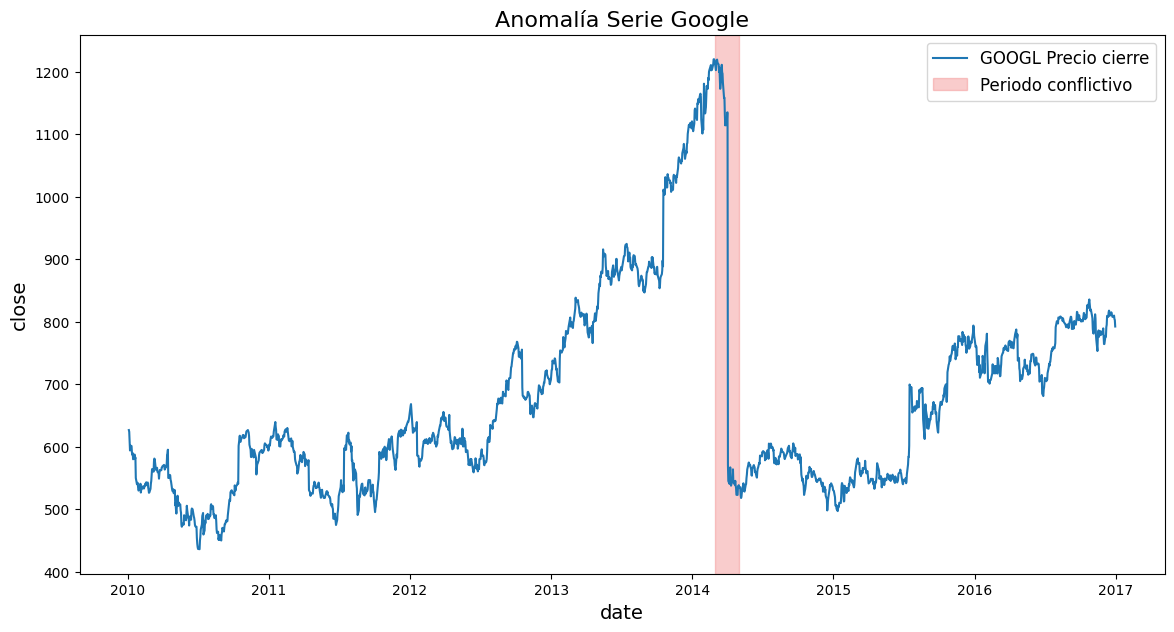

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
inicio_anomalia = pd.to_datetime('2014-03-01')
fin_anomalia = pd.to_datetime('2014-05-01')
plt.figure(figsize=(14, 7))
plt.plot(pivot.index, pivot['GOOGL'], label='GOOGL Precio cierre', linewidth=1.5)

plt.axvspan(inicio_anomalia, fin_anomalia, color='lightcoral', alpha=0.4, label='Periodo conflictivo')

plt.title('Anomalía Serie Google', fontsize=16)
plt.xlabel('date', fontsize=14)
plt.ylabel('close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

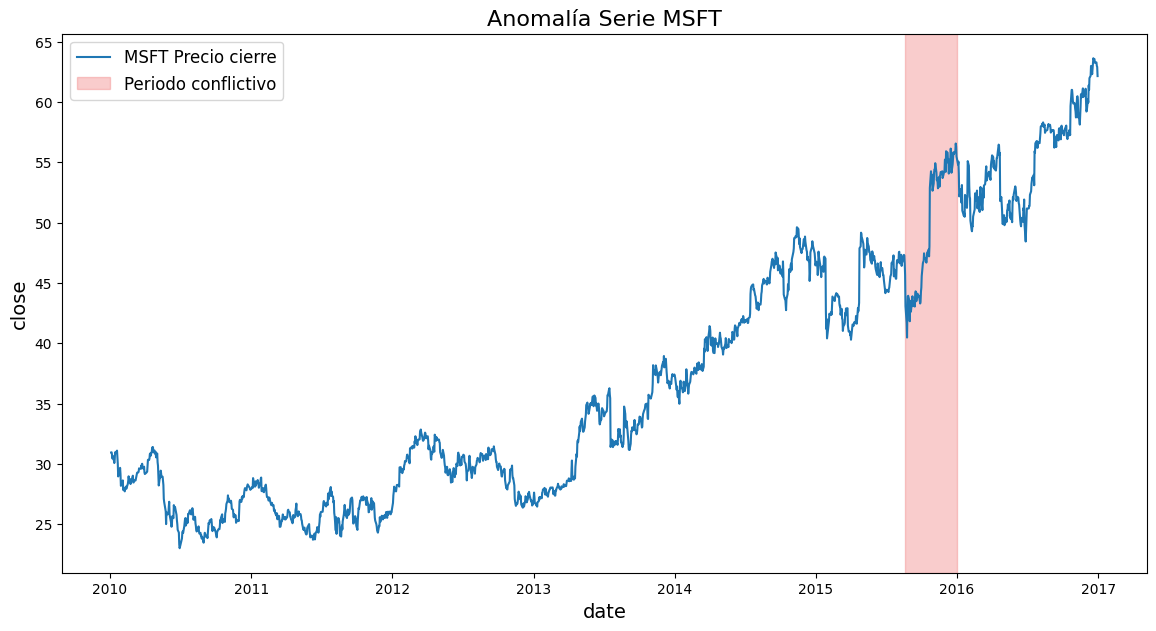

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
inicio_anomalia = pd.to_datetime('2015-08-20')
fin_anomalia = pd.to_datetime('2016-01-01')
plt.figure(figsize=(14, 7))
# Use pivot_microsoft instead of pivot to access the 'MSFT' column
plt.plot(pivot_microsoft.index, pivot_microsoft['MSFT'], label='MSFT Precio cierre', linewidth=1.5)

plt.axvspan(inicio_anomalia, fin_anomalia, color='lightcoral', alpha=0.4, label='Periodo conflictivo')

plt.title('Anomalía Serie MSFT', fontsize=16)
plt.xlabel('date', fontsize=14)
plt.ylabel('close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

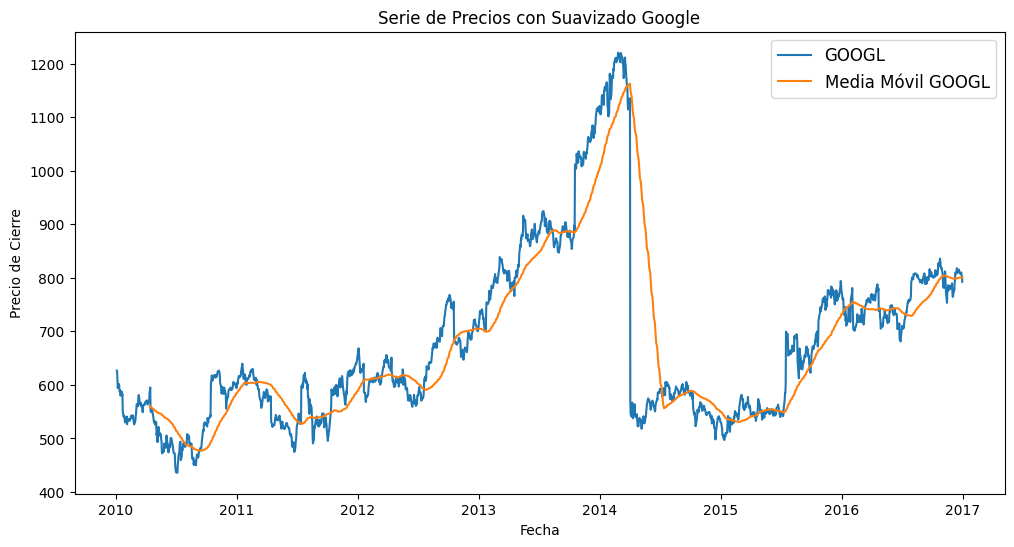

In [42]:
ventana_suavizado = 70
media_movil = pivot.rolling(window=ventana_suavizado).mean()
plt.figure(figsize=(12, 6))
plt.plot(pivot['GOOGL'], label='GOOGL')
plt.plot(media_movil['GOOGL'], label='Media Móvil GOOGL')
plt.title('Serie de Precios con Suavizado Google')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(fontsize=12)
plt.show()

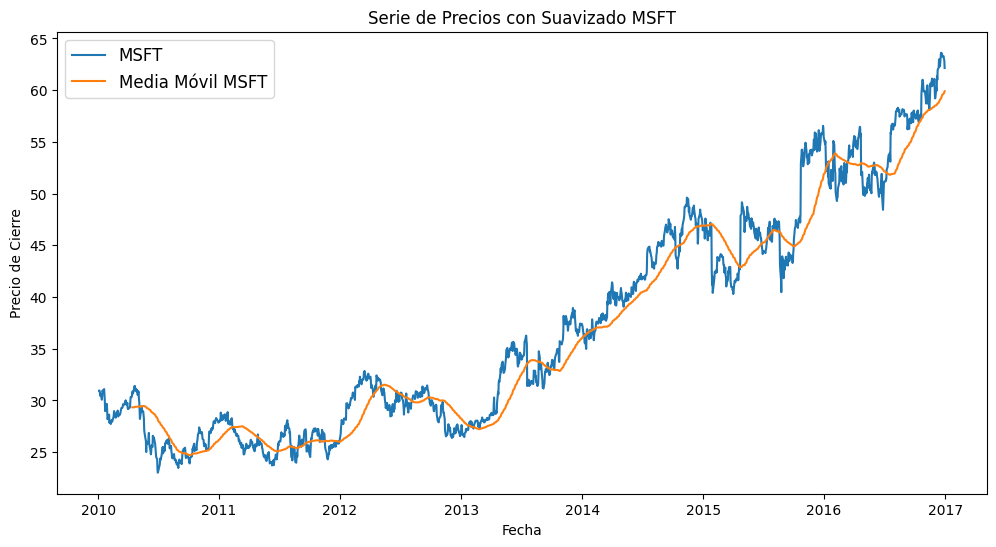

In [44]:
ventana_suavizado = 70
media_movil = pivot_microsoft.rolling(window=ventana_suavizado).mean() # Changed to pivot_microsoft
plt.figure(figsize=(12, 6))
plt.plot(pivot_microsoft['MSFT'], label='MSFT') # Changed to pivot_microsoft
plt.plot(media_movil['MSFT'], label='Media Móvil MSFT')
plt.title('Serie de Precios con Suavizado MSFT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(fontsize=12)
plt.show()

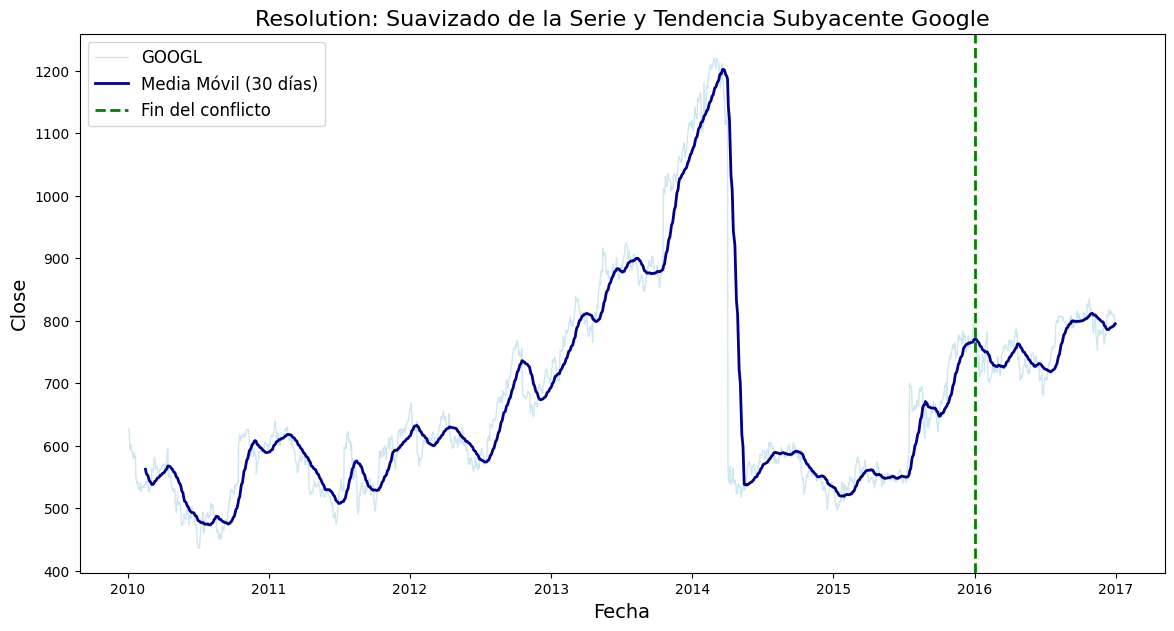

In [45]:
# Calcular una media móvil como solución para suavizar la serie
ventana = 30
# Apply rolling mean to the 'close' column which contains numerical data, instead of 'date' column
# Calculate and store 'MediaMovil' within the 'pivot' DataFrame
pivot['MediaMovil'] = pivot['GOOGL'].rolling(window=ventana).mean()

plt.figure(figsize=(14, 7))
# Plot 'close' values instead of 'date' for the original values
# Use pivot.index as x-axis to align with the data in pivot['GOOGL']
plt.plot(pivot.index, pivot['GOOGL'], label='GOOGL', color='lightblue', linewidth=1, alpha=0.6)
# Plot 'MediaMovil' from the 'pivot' DataFrame
plt.plot(pivot.index, pivot['MediaMovil'], label=f'Media Móvil ({ventana} días)', color='darkblue', linewidth=2)

# Resaltar la resolución con una línea vertical marcando el fin del periodo conflictivo
plt.axvline(pd.to_datetime(fin_anomalia), color='green', linestyle='--', linewidth=2, label='Fin del conflicto')

plt.title('Resolution: Suavizado de la Serie y Tendencia Subyacente Google', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
# Update y-axis label to reflect 'close' values
plt.ylabel('Close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

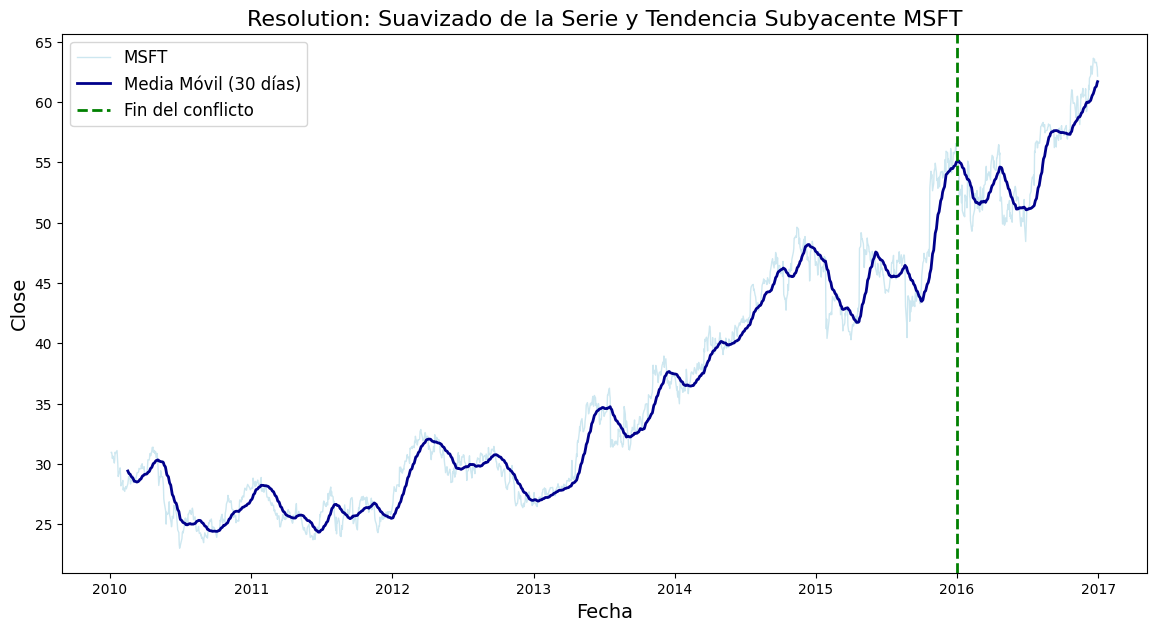

In [47]:
# Calcular una media móvil como solución para suavizar la serie
ventana = 30
# Apply rolling mean to the 'close' column which contains numerical data, instead of 'date' column
# Calculate and store 'MediaMovil' within the 'pivot_microsoft' DataFrame
pivot_microsoft['MediaMovil'] = pivot_microsoft['MSFT'].rolling(window=ventana).mean() # Use pivot_microsoft instead of pivot

plt.figure(figsize=(14, 7))
# Plot 'close' values instead of 'date' for the original values
# Use pivot_microsoft.index as x-axis to align with the data in pivot_microsoft['MSFT']
plt.plot(pivot_microsoft.index, pivot_microsoft['MSFT'], label='MSFT', color='lightblue', linewidth=1, alpha=0.6) # Use pivot_microsoft instead of pivot
# Plot 'MediaMovil' from the 'pivot_microsoft' DataFrame
plt.plot(pivot_microsoft.index, pivot_microsoft['MediaMovil'], label=f'Media Móvil ({ventana} días)', color='darkblue', linewidth=2) # Use pivot_microsoft instead of pivot

# Resaltar la resolución con una línea vertical marcando el fin del periodo conflictivo
plt.axvline(pd.to_datetime(fin_anomalia), color='green', linestyle='--', linewidth=2, label='Fin del conflicto')

plt.title('Resolution: Suavizado de la Serie y Tendencia Subyacente MSFT', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
# Update y-axis label to reflect 'close' values
plt.ylabel('Close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

Para evaluar la tendencia en 2016, pienso que un rango de ventana adecuado sería entre 30 y 70 días, ya que este intervalo permite captar la tendencia general y adaptarse a las variaciones en los datos de ese año específico. Una ventana demasiado pequeña sería excesivamente sensible a las variaciones a corto plazo y podría no reflejar con precisión la tendencia general. Por otro lado, una ventana muy amplia podría suavizar en exceso los datos. Tras suavizar los datos, la línea de tendencia filtrada de Google muestra una trayectoria ascendente constante, con una volatilidad reducida en comparación con los datos originales. De manera similar, la línea de tendencia suavizada de Microsoft también revela una tendencia positiva. No obstante, esta última es menos marcada y presenta periodos de crecimiento más lento en relación con Google. El suavizado mediante una media móvil contribuye a esclarecer las tendencias subyacentes y a eliminar el ruido a corto plazo de los datos.

## Conclusiones y Entrega

En este taller se ha realizado lo siguiente:

- Se cargaron los datos y se filtraron únicamente para las empresas Google y Microsoft.
- Se convirtió la columna `date` de forma robusta, eliminando filas con fechas inválidas.
- Se ordenaron los datos cronológicamente y se obtuvieron información general (primer y último año, número de observaciones por empresa).
- Se construyó una gráfica de storytelling con dos etapas:
  - **Setup:** Visualización inicial de los precios de cierre originales para Google y Microsoft.
  - **Resolution:** Aplicación de un suavizado (media móvil) para resaltar la tendencia general.

Tu entrega final debe incluir las gráficas generadas y una breve explicación de cada paso, respondiendo las preguntas planteadas en el taller.